# Content-Based and User-Based Filtering Anime Movie Recommender System
Steps:
1. Collect anime movie data
2. Extract features and Data Preprocessing
4. Cosine Similarity for Content-Based 
5. Correlation for User-Based
5. Generate recommendation

# Library needed to be import

In [71]:
#Pandas tries to determine what dtype to set by analyzing the data in each column.
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Variable declaration

In [3]:
# Record start time
start_time = time.time()
#n = number of results/output want print  
n = 10
#target_user = user_id is equal to a specific user 
target_user = int


# Load dataset into dataframe

In [4]:
#to set the low memory to be false because guessing dtypes for each column is very memory demanding. 
#anime_movie_data = content based data
anime_movie_data = pd.read_csv('anime.csv', low_memory = False)
anime_movie_data = pd.DataFrame(anime_movie_data)
anime_movie_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
#user_rating_data = user rating data
user_rating_data = pd.read_csv('rating.csv', low_memory = False)
user_rating_data = user_rating_data[0:6000000]
new_user_rating = pd.read_csv('newRating.csv', low_memory = False)
user_rating_data = pd.DataFrame(user_rating_data)
user_rating_data = pd.concat([user_rating_data, new_user_rating])
user_rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
75,75005,10620,9
76,75005,22319,10
77,75005,15689,10
78,75005,33286,4


# Feature Extraction + Data Preprocessing
 Identifying and extracting relevant features from the movie data that can be used to generate recommendations.

# Change Data Type

In [6]:
anime_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
#change data type
anime_movie_data['episodes'] = anime_movie_data['episodes'].replace('Unknown', -1)
anime_movie_data = anime_movie_data.astype({"name":"string","genre":"string","type":"string","episodes":"int64"})

In [8]:
anime_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  string 
 2   genre     12232 non-null  string 
 3   type      12269 non-null  string 
 4   episodes  12294 non-null  int64  
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(3), string(3)
memory usage: 672.5 KB


In [9]:
user_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000080 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 183.1 MB


# Put a meningful variable name

In [10]:
#Rename Variable
anime_movie_data = anime_movie_data.rename(columns={"rating": "avg_rating"})
anime_movie_data.head(5)

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [11]:
#Rename Variable
user_rating_data = user_rating_data.rename(columns={"rating": "user_rating"})
user_rating_data.head(5)

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# Removing null value

In [12]:
#Check is missing value in each column of a Data Frame and count the total number of true null or NaN?
anime_movie_data.isna().sum()

anime_id        0
name            0
genre          62
type           25
episodes        0
avg_rating    230
members         0
dtype: int64

In [13]:
#Drop those missing value by removing the row (axis = 0) with missing value; remove column (axis = 1) 
#and inplace = True --> modify the original DataFrame in place.
anime_movie_data.dropna(axis=0, inplace= True)
anime_movie_data.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
avg_rating    0
members       0
dtype: int64

In [14]:
user_rating_data.isna().sum()

user_id        0
anime_id       0
user_rating    0
dtype: int64

# Removing stop words

In [15]:
tfidf = TfidfVectorizer(stop_words = 'english')


# Removing unused label

In [16]:
# Drop the 'members' column from the DataFrame
#anime_movie_data.drop('members', axis=1, inplace=True)
#anime_movie_data

# Clean Text

In [17]:
anime_movie_data

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [18]:
# Define a function to clean the text
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z0-9\s]', ' ', text)
    return text

In [19]:
anime_movie_data['name']=anime_movie_data['name'].apply(clean_text)
anime_movie_data

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover Minami tai Mecha Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi Inma Dens...,Hentai,OVA,1,4.98,175


# Remove duplicate records

In [20]:
# Show duplicate rows based on all columns
duplicate_anime = anime_movie_data[anime_movie_data.duplicated()].shape[0]
print(f'Number of duplicate anime records: {duplicate_anime}')

Number of duplicate anime records: 0


In [21]:
duplicate_rating = user_rating_data[user_rating_data.duplicated()].shape[0]
print(f'Number of duplicate rating records: {duplicate_rating}')

Number of duplicate rating records: 1


In [22]:
#keep = specifies which duplicate values to keep, default = first 
#inplace = specify whether to modify the DataFrame in place or to return a new DataFrame with the duplicates removed. 
user_rating_data.drop_duplicates(keep='first',inplace=True)
duplicate_rating = user_rating_data[user_rating_data.duplicated()].shape[0]
print(f'Number of duplicate rating records:: {duplicate_rating}')

Number of duplicate rating records:: 0


# Merging 2 dataset based on anime_id

In [23]:
merge_data = pd.merge(user_rating_data, anime_movie_data, on='anime_id', sort = True)
merge_data

,user_id,anime_id,user_rating,name,genre,type,episodes,avg_rating,members
0,13,1,-1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,19,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
2,21,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
3,23,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
4,32,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
...,...,...,...,...,...,...,...,...,...
5999973,48766,34367,-1,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports",Special,1,5.97,582
5999974,13954,34475,6,Monster Strike Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313
5999975,53492,34475,5,Monster Strike Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313
5999976,48766,34476,-1,Platonic Chain Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51


In [24]:
#check each anime got how much rating
anime_rating_data = pd.DataFrame(merge_data.groupby('anime_id')['user_rating'].count())
anime_rating_data.head()

,user_rating
anime_id,
1,11729
5,5144
6,8368
7,1843
8,309


# Data Trimming

In [25]:
#to get the number of user rating for each anime 
data_grouping = pd.DataFrame(merge_data.groupby('anime_id')['user_rating'].count()).sort_values(by='user_rating', ascending= False)
data_grouping.describe()

,user_rating
count,11135.000000
mean,538.839515
std,1567.309203
min,1.000000
25%,4.000000
50%,40.000000
75%,299.000000
max,30218.000000


In [26]:
#get the anime that had the number of user rating less than the mean value
trim_data = data_grouping[data_grouping['user_rating'] > data_grouping.mean()[0]]
#trim the data
merge_data = merge_data.loc[merge_data['anime_id'].isin(trim_data.index.values.tolist())]
merge_data

,user_id,anime_id,user_rating,name,genre,type,episodes,avg_rating,members
0,13,1,-1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,19,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
2,21,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
3,23,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
4,32,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
...,...,...,...,...,...,...,...,...,...
5999913,55952,34240,8,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
5999914,56035,34240,10,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
5999915,56093,34240,-1,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
5999916,56120,34240,7,Shelter,"Music, Sci-Fi",Music,1,8.38,71136


# Algorithm 1: Content-Based

# Construct the TF-IDF matrix

In [60]:
#Compute the TF-IDF matrix based on the name
tfidf_matrix = tfidf.fit_transform(anime_movie_data['name'])
print(type(tfidf_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


In [61]:
tfidf.vocabulary_

{'drama': 8,
 'romance': 30,
 'school': 32,
 'supernatural': 41,
 'action': 0,
 'adventure': 1,
 'fantasy': 10,
 'magic': 20,
 'military': 23,
 'shounen': 36,
 'comedy': 5,
 'historical': 15,
 'parody': 26,
 'samurai': 31,
 'sci': 33,
 'fi': 11,
 'thriller': 42,
 'sports': 39,
 'super': 40,
 'power': 28,
 'space': 38,
 'slice': 37,
 'life': 19,
 'mecha': 22,
 'music': 24,
 'mystery': 25,
 'seinen': 34,
 'martial': 21,
 'arts': 3,
 'vampire': 43,
 'shoujo': 35,
 'horror': 16,
 'police': 27,
 'psychological': 29,
 'demons': 7,
 'ecchi': 9,
 'josei': 17,
 'ai': 2,
 'game': 12,
 'dementia': 6,
 'harem': 13,
 'cars': 4,
 'kids': 18,
 'hentai': 14,
 'yaoi': 44,
 'yuri': 45}

# Anime Movie's Name Information

In [40]:
anime_movie_data.name.head()

0                      Kimi no Na wa 
1    Fullmetal Alchemist  Brotherhood
2                            Gintama 
3                         Steins Gate
4                       Gintama  039 
Name: name, dtype: object

In [41]:
name_size = len(anime_movie_data.name)
print(name_size)

12017


# Movie with same genre via 'loc' property
 loc property is used to access a group of rows and columns by label(s)

In [42]:
# Search for the 'Clanned' name using loc property
anime_by_name = anime_movie_data.copy().loc[anime_movie_data['name'].str.contains('Clannad')]
anime_by_name.head()

,anime_id,name,genre,type,episodes,avg_rating,members
10,4181,Clannad After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690
370,4059,Clannad Mou Hitotsu no Sekai Tomoyo hen,"Drama, Romance, School, Slice of Life",Special,1,8.14,160423
504,6351,Clannad After Story Mou Hitotsu no Sekai K...,"Drama, Romance, School",Special,1,8.02,138364
2103,1723,Clannad Movie,"Drama, Fantasy, Romance, School",Movie,1,7.35,99506


# Cosine Similarity

In [65]:
# Compute the Cosine Similarity in terms of pairwise similarities
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [43]:
# Create a pandas series where indexes are values and titles are indexes
indices = pd.Series(anime_movie_data.index, index = anime_movie_data['name']).drop_duplicates()

# Check the first 10 indices
indices[:n]

name
Kimi no Na wa                                                0
Fullmetal Alchemist  Brotherhood                             1
Gintama                                                      2
Steins Gate                                                  3
Gintama  039                                                 4
Haikyuu    Karasuno Koukou VS Shiratorizawa Gakuen Koukou    5
Hunter x Hunter  2011                                        6
Ginga Eiyuu Densetsu                                         7
Gintama Movie  Kanketsu hen   Yorozuya yo Eien Nare          8
Gintama  039   Enchousen                                     9
dtype: int64

# Recommend anime movie function based on cosine similarity

In [62]:
# Define a function to get recommended movies
def get_recommendations_content_based(name, cosine_sim):
    # Get the index of the movie that matches the name
    index = indices[name]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar movies
    sim_scores = sim_scores[:n]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return anime_movie_data['name'].iloc[movie_indices],  [i[1] for i in sim_scores]

# User input for the specific user id

In [52]:
target_user = int(input('Enter a user id (75000 - 75005) is the new added user:')) 

# Top 10 recommended anime movie based on the top rating movie name from specific user id 

Text(0, 0.5, 'Frequency')

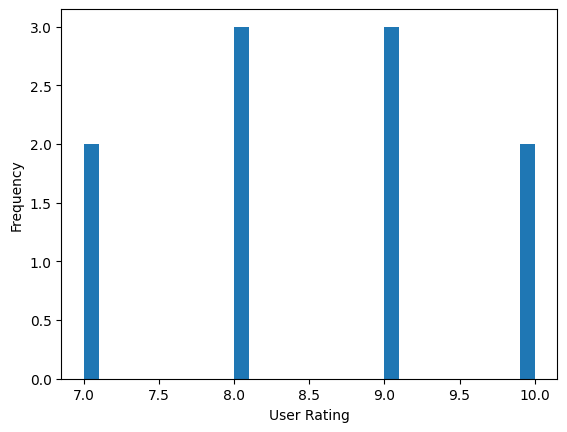

In [53]:
# Get recommendations for a given movie name by a top rated movie from s specific user id 
target_user_data = merge_data[merge_data['user_id'] == target_user].sort_values(by='user_rating', ascending=False)

#print the user_rating histogram 
target_user_rating_data = pd.DataFrame(target_user_data.groupby('anime_id')['user_rating'].mean()).sort_values(by='user_rating', ascending= False)
# target_user_rating_data['user_rating'].hist(bins=30)
plt.hist(target_user_rating_data['user_rating'], bins=30)
# plt.figure(figsize=(12,4))
# plt.barh(target_user_rating_data['name'].head(5), target_user_rating_data['user_rating'].head(5), align='center', color = 'skyblue')
plt.xlabel('User Rating')
plt.ylabel('Frequency')



In [67]:

name = target_user_data['name'].values[0]

content_based_recommendations, sim_scores = get_recommendations_content_based(name, cosine_sim)

# Print the top 10 recommended movies
content_based_recommendations=pd.DataFrame(content_based_recommendations)
content_based_recommendations['similarity_score'] = sim_scores[:n]
content_based_recommendations


,name,similarity_score
10,Clannad After Story,1.000000
223,Clannad,0.782779
2103,Clannad Movie,0.700956
504,Clannad After Story Mou Hitotsu no Sekai K...,0.583287
1334,Brave Story,0.401699
11939,Terra Story,0.395304
12183,Junk Story,0.382273
370,Clannad Mou Hitotsu no Sekai Tomoyo hen,0.361187
7228,Bologee Story,0.358556
6161,True Love Story,0.353646


Text(0.5, 1.0, 'Distribution of cosine similarity scores of the anime')

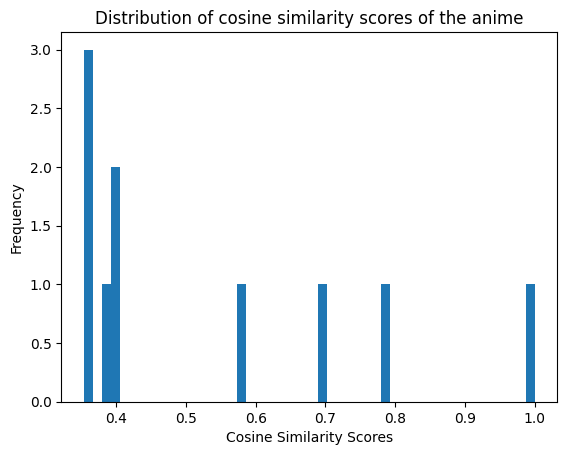

In [73]:
#print the user_rating histogram 
# target_name_similarity_score = pd.DataFrame(target_user_data.groupby('name')['similarity_score']).sort_values(by='similarity_score', ascending= False)
# target_user_rating_data['user_rating'].hist(bins=30)
plt.hist(content_based_recommendations['similarity_score'], bins=50)
# plt.figure(figsize=(12,4))
# plt.barh(target_user_rating_data['name'].head(5), target_user_rating_data['user_rating'].head(5), align='center', color = 'skyblue')
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Frequency')
plt.title('Distribution of cosine similarity scores of the anime')

# Algorithm 2: User-based 

# Find the user-item matrix

In [59]:
#matrix which the anime had been rating by the user
user_anime_matrix = merge_data.pivot_table(index = 'user_id', columns = ['anime_id'], values = 'user_rating')
user_anime_matrix.fillna(-1, inplace=True)
user_anime_matrix.head(10)

anime_id,1,5,6,7,15,16,18,19,20,22,...,32668,32681,32729,32828,32935,32998,33028,33558,34103,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,8.0,-1.0,6.0,-1.0,6.0,-1.0,6.0,5.0,...,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [39]:
merge_data.user_rating.info()

<class 'pandas.core.series.Series'>
Index: 5331502 entries, 0 to 5999917
Series name: user_rating
Non-Null Count    Dtype
--------------    -----
5331502 non-null  int64
dtypes: int64(1)
memory usage: 81.4 MB


In [40]:
anime_user_matrix = user_anime_matrix.transpose()
anime_user_matrix.head(10)

user_id,1,2,3,4,5,6,7,8,9,10,...,56310,56311,56312,56313,75000,75001,75002,75003,75004,75005
anime_id,,,,,,,,,,,,,,,,,,,,,
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,-1.0,-1.0,-1.0,9.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
18,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20,-1.0,-1.0,8.0,-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Select a user for target user to compare correlation with other users

In [41]:
anime_user_rating = anime_user_matrix[target_user]
pd.DataFrame(anime_user_rating.sort_values(ascending= False)).rename(columns={target_user: f"user with id {target_user}'s rating"})

,user with id 75002's rating
anime_id,
4181,10.0
23273,10.0
9989,9.0
4224,9.0
6547,9.0
...,...
2520,-1.0
2508,-1.0
2494,-1.0


# Find correlation with other users

In [42]:
# Find correlation between user_id = 85 based on the ratings of movies
similar_users = anime_user_matrix.corrwith(anime_user_rating).dropna()
similar_users

user_id
1       -0.002997
2       -0.001497
3        0.073042
5        0.070349
7        0.021180
           ...   
75001   -0.004237
75002    1.000000
75003    0.518556
75004    0.173732
75005   -0.005164
Length: 53199, dtype: float64

# Transform it into Data Frame

In [43]:
# Create a dataframe with similar movies as the index column and correlation as another column
similar_users = pd.DataFrame(similar_users, columns = ['correlation'])
similar_users.head(10)

,correlation
user_id,
1,-0.002997
2,-0.001497
3,0.073042
5,0.070349
7,0.021180
8,-0.005136
9,-0.001497
10,-0.002592
11,0.024345


# Show user with highest correlation

In [44]:
#except the most_similar_users[0] = traget_user  
most_similar_users = similar_users.sort_values(by = 'correlation', ascending = False)
most_similar_users = most_similar_users[1:]
most_similar_users

,correlation
user_id,
9206,0.525394
75003,0.518556
8630,0.511676
37780,0.490712
48758,0.490610
...,...
16444,-0.032900
50300,-0.033409
5492,-0.033605


In [45]:
#print user_id with highest correlation
most_similar_users = most_similar_users.index.values.tolist()
highest_correlation_user = most_similar_users[0]
highest_correlation_user

9206

# 10 best recommend rated anime movie from the user that have highest correlation value

In [46]:
#sort highest rating to lowest rating
#target_user = merge_data.loc[merge_data['user_id'] == target_user].sort_values(by= 'user_rating', ascending= False)
#recommend anime movie based on similar user
user_based_recommendations = merge_data[merge_data['user_id'] == highest_correlation_user].sort_values('user_rating', ascending=False)
user_based_recommendations = user_based_recommendations[:n]
user_based_recommendations

,user_id,anime_id,user_rating,name,genre,type,episodes,avg_rating,members
2465114,9206,4181,10,Clannad After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
3737295,9206,9989,10,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,8.62,463835
4799022,9206,16498,10,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
5367833,9206,22319,10,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,8.07,618056
5437888,9206,23273,10,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397
2501283,9206,4224,9,Toradora,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
4195893,9206,11757,9,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1917447,9206,2167,-1,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690
3021844,9206,6547,-1,Angel Beats,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


# Final recommended anime movie system: Combine content-based and user-based 

In [47]:
#make each of the result to a list 
content_based_recommendations_list = content_based_recommendations.index.tolist()
content_based_recommendations_list

[10, 223, 2103, 504, 1334, 11939, 12183, 370, 7228, 6161]

In [48]:
user_based_recommendations_list = user_based_recommendations['anime_id'].tolist()
user_based_recommendations_list

[4181, 9989, 16498, 22319, 23273, 4224, 11757, 2167, 6547]

In [49]:
final_anime_recommend = content_based_recommendations_list.copy()
final_anime_recommend += user_based_recommendations_list.copy()
final_anime_recommend

[10,
 223,
 2103,
 504,
 1334,
 11939,
 12183,
 370,
 7228,
 6161,
 4181,
 9989,
 16498,
 22319,
 23273,
 4224,
 11757,
 2167,
 6547]

In [50]:
#the anime that use to do the content based filtering
target_anime = target_user_data.iloc[0]
pd.DataFrame(target_anime)

,2476770
user_id,75002
anime_id,4181
user_rating,10
name,Clannad After Story
genre,"Drama, Fantasy, Romance, Slice of Life, Supern..."
type,TV
episodes,24
avg_rating,9.06
members,456749


In [51]:
#the list of the target user's rating 
pd.DataFrame(target_user_data)

,user_id,anime_id,user_rating,name,genre,type,episodes,avg_rating,members
2476770,75002,4181,10,Clannad After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
5443794,75002,23273,10,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397
2516985,75002,4224,9,Toradora,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
3039944,75002,6547,9,Angel Beats,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
3748758,75002,9989,9,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,8.62,463835
4130689,75002,11553,8,Toradora Bentou no Gokui,"Comedy, Romance, School, Slice of Life",Special,1,7.54,71433
5869574,75002,31043,8,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12,8.65,402381
5965366,75002,32281,8,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
3235401,75002,7311,7,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297
5886929,75002,31240,7,Re Zero kara Hajimeru Isekai Seikatsu,"Drama, Fantasy, Psychological, Thriller",TV,25,8.64,355839


# Display the final recommendation

In [52]:
recommend_anime = anime_movie_data.loc[anime_movie_data['anime_id'].isin(final_anime_recommend)]
recommend_anime.drop_duplicates(subset=['anime_id'], keep=False)
pd.DataFrame(recommend_anime)

,anime_id,name,genre,type,episodes,avg_rating,members
10,4181,Clannad After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397
57,9989,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,8.62,463835
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
131,4224,Toradora,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
159,6547,Angel Beats,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690
346,223,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,8.16,316102
449,22319,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,8.07,618056
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100


In [53]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 48.43702816963196 seconds
